<a href="https://colab.research.google.com/github/AmirHoseein99/project_and_challenges/blob/master/Pawpularity_Contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[1]*10**10

In [ ]:
!wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/25383/2684322/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1639817788&Signature=WvdBPITyG8jXgM6VObzrgMtCjK%2F%2Bg44vzoo5X8ezIm6Tzan5BIGPsRfOnsJ4HHbFX2ow9Plq3azj0B6khJbPf7PM9yQbQatemA2NF2WLo9AmC%2BrncBUi6gIGEoVPOLqRHnkscjkF%2FiLdjs0Tt9Ih1C3P0PmSp1NqtuXXVWYANIiX0kwBM7Zm9P%2B9UrDyOmgVfJ65exF70Dn7rnjCKzjHYWAOofCugFVrPYZ1%2BMB%2FwAjksv4nQZl6Bpplrg1kbEDpdzhjZtPiG9S8b%2B1V61aitdo%2B1CwTd5jHwIR%2FttJM850XLgUxhLTdqg1mD66eZ%2FDp5P2e34AtIm4UiRy7VmMCAw%3D%3D&response-content-disposition=attachment%3B+filename%3Dpetfinder-pawpularity-score.zip"

In [ ]:
!unzip "/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1639817788&Signature=WvdBPITyG8jXgM6VObzrgMtCjK%2F+g44vzoo5X8ezIm6Tzan5BIGPsRfOnsJ4HHbFX2ow9Plq3azj0B6khJbPf7PM9yQbQatemA2NF2WLo9AmC+rncBUi6gIGEoVPOLqRHnk"

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [7]:
train_metadata = pd.read_csv("/content/train.csv")
test_metadata = pd.read_csv("/content/test.csv")

In [8]:
import cv2
import os
def load_images_from_folder(folder):
    images = []
    id = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, (48, 48), interpolation = cv2.INTER_AREA)
        id.append(filename.split('.')[0])
        images.append(img)
    return   np.array(images)/255.0, np.array(id)

In [9]:
test_images, test_Ids = load_images_from_folder("/content/test")
train_images, train_Ids = load_images_from_folder("/content/train")

In [ ]:
test_metadata

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0
5,b03f7041962238a7c9d6537e22f9b017,0,0,1,1,1,1,1,1,1,0,1,0
6,c978013571258ed6d4637f6e8cc9d6a3,1,0,0,0,1,1,0,1,0,1,1,1
7,e0de453c1bffc20c22b072b34b54e50f,1,0,1,0,0,0,0,0,1,0,0,1


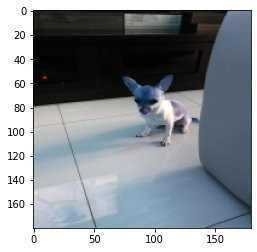

In [ ]:
pawpular_pet_imgae_id =train_metadata.query('Pawpularity == 100').iloc[:, 0].iloc[0]
imgae_index = np.argwhere(Ids == pawpular_pet_imgae_id)[0][0]
plt.imshow(images[imgae_index])

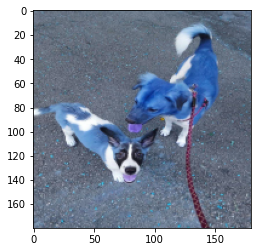

In [ ]:
pawpular_pet_imgae_id = train_metadata.query('Pawpularity == 100').iloc[:, 0].iloc[1]
imgae_index = np.argwhere(Ids == pawpular_pet_imgae_id)[0][0]
plt.imshow(images[imgae_index])

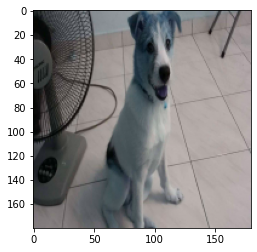

In [ ]:
pawpular_pet_imgae_id = train_metadata.query('Pawpularity == 100').iloc[:, 0].iloc[2]
imgae_index = np.argwhere(Ids == pawpular_pet_imgae_id)[0][0]
plt.imshow(images[imgae_index])

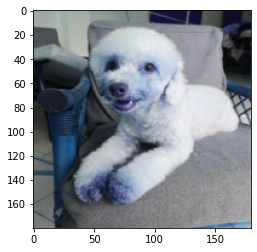

In [ ]:
pawpular_pet_imgae_id = train_metadata.query('Pawpularity == 100').iloc[:, 0].iloc[3]
imgae_index = np.argwhere(Ids == pawpular_pet_imgae_id)[0][0]
plt.imshow(images[imgae_index])

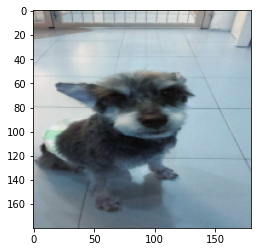

In [ ]:
pawpular_pet_imgae_id = train_metadata.query('Pawpularity == 100').iloc[:, 0].iloc[4]
imgae_index = np.argwhere(Ids == pawpular_pet_imgae_id)[0][0]
plt.imshow(images[imgae_index])

4
318
63.0


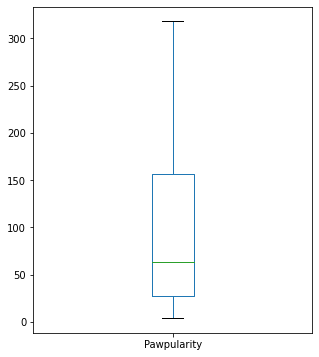

In [ ]:
plt.figure(figsize=(5, 6))
train_metadata.Pawpularity.value_counts().sort_values().plot(kind = 'box')
print(train_metadata.Pawpularity.value_counts().min())
print(train_metadata.Pawpularity.value_counts().max())
print(train_metadata.Pawpularity.value_counts().median())

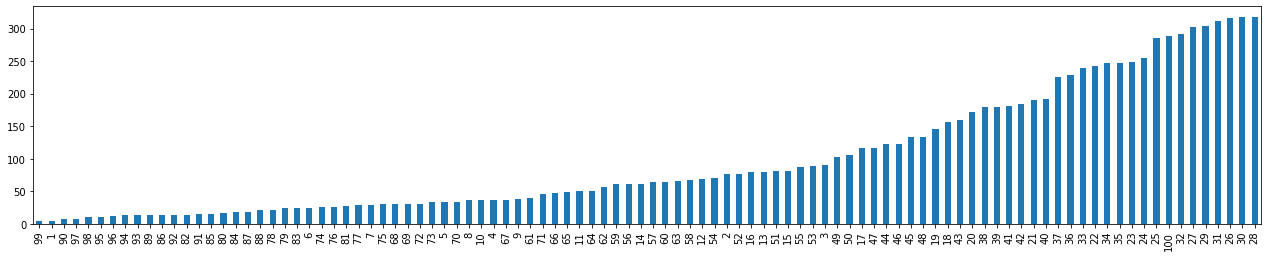

In [10]:
plt.figure(figsize=(22, 4))
plt.xticks(rotation = 45)
train_metadata.Pawpularity.value_counts().sort_values().plot(kind = 'bar')

In [ ]:
train_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [17]:
meta_input= keras.layers.Input(shape=[12])
img_input= keras.layers.Input(shape=[48, 48, 3])
Conv1 = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(img_input)
Mpl1 = keras.layers.MaxPooling2D(2)(Conv1)
Conv2 = keras.layers.Conv2D(128, 3, activation="relu", padding="same")(Mpl1)
Conv3 = keras.layers.Conv2D(128, 3, activation="relu", padding="same")(Conv2)
Mpl2 = keras.layers.MaxPooling2D(2)(Conv3)
Conv4 = keras.layers.Conv2D(256, 3, activation="relu", padding="same")(Mpl2)
Conv5 = keras.layers.Conv2D(256, 3, activation="relu", padding="same")(Conv4)
Mpl3 = keras.layers.MaxPooling2D(2)(Conv5)
Flatten = keras.layers.Flatten()(Mpl3)
# Dense1 = keras.layers.Dense(128, activation="relu")(Flatten)
Dense1 = keras.layers.Dense(64, activation="relu")(Flatten)
concat = keras.layers.Concatenate()([meta_input, Dense1])
Dense3 = keras.layers.Dense(10, activation="relu")(Dense1)
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[meta_input, img_input], outputs=[output])

In [18]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 48, 48, 64)   1792        ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 24, 24, 64)  0           ['conv2d_5[0][0]']               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 24, 24, 128)  73856       ['max_pooling2d_3[0][0]']        
                                                                                            

In [19]:
model.compile(loss='mean_absolute_error',
              optimizer="adam",
              metrics=[tf.keras.metrics.MeanSquaredError()]
              )

In [20]:
X_meta, y_meta = train_metadata.iloc[:, 1:-1].to_numpy(), train_metadata.iloc[:, -1].to_numpy()

In [22]:
callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

In [23]:
history = model.fit((X_meta, train_images), y_meta, validation_split=0.1, epochs=500, callbacks=callbacks, verbose=1, batch_size = 32)

Epoch 1/500
279/279 [==============================] - 9s 29ms/step - loss: 16.1233 - mean_squared_error: 503.2284 - val_loss: 14.9615 - val_mean_squared_error: 464.3542 - lr: 0.0010
Epoch 2/500
279/279 [==============================] - 7s 26ms/step - loss: 15.1728 - mean_squared_error: 463.1526 - val_loss: 14.8227 - val_mean_squared_error: 451.9481 - lr: 0.0010
Epoch 3/500
279/279 [==============================] - 7s 27ms/step - loss: 15.0556 - mean_squared_error: 457.0862 - val_loss: 14.8571 - val_mean_squared_error: 419.6770 - lr: 0.0010
Epoch 4/500
279/279 [==============================] - 7s 26ms/step - loss: 15.0356 - mean_squared_error: 454.9059 - val_loss: 14.9366 - val_mean_squared_error: 415.4617 - lr: 0.0010
Epoch 5/500
279/279 [==============================] - 7s 26ms/step - loss: 14.9725 - mean_squared_error: 451.2822 - val_loss: 14.8357 - val_mean_squared_error: 454.6681 - lr: 0.0010
Epoch 6/500
279/279 [==============================] - 7s 25ms/step - loss: 15.0270 -

In [ ]:
predicts = {}
for index in range(len(test_Ids)):
  id = test_Ids[index]
  meta = test_metadata.loc[test_metadata.Id == id].values[0][1:]
  meta = np.asarray(meta).astype('float32')
  img = test_images[index]
  meta = meta.reshape(-1,12)
  img = img.reshape(-1, 128, 128, 3)
  predicts[id] = model.predict((meta, img))

In [ ]:
Id= np.array(list(predicts.keys())).reshape(8, 1)
Pawpularity= np.array(list(predicts.values())).reshape(8, 1)

In [ ]:
submit = np.append(Id, Pawpularity, axis=1)

In [ ]:
submit = pd.DataFrame(submit, columns=["Id", "Pawpularity"])

In [ ]:
submit

,Id,Pawpularity
0,4128bae22183829d2b5fea10effdb0c3,31.034058
1,43a2262d7738e3d420d453815151079e,31.217274
2,4e429cead1848a298432a0acad014c9d,28.762026
3,80bc3ccafcc51b66303c2c263aa38486,29.929934
4,8f49844c382931444e68dffbe20228f4,28.587833
5,b03f7041962238a7c9d6537e22f9b017,27.619198
6,c978013571258ed6d4637f6e8cc9d6a3,31.264627
7,e0de453c1bffc20c22b072b34b54e50f,24.073034
